<a href="https://colab.research.google.com/github/shanxar/SCIKIT/blob/main/sk_linear_reg_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

path = kagglehub.dataset_download("prevek18/ames-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ames-housing-dataset


In [3]:
import os

path=os.path.join(path,os.listdir(path)[0])
print(path)

/kaggle/input/ames-housing-dataset/AmesHousing.csv


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

#STEP 1: LOAD DATA
df=pd.read_csv(path)

print(df.columns)

df.dropna(inplace=True,axis=1) #remove na columns

#STEP 2: SPLIT FEATURES AND LABELS

X=df.drop('SalePrice',axis=1)
Y=df['SalePrice']


#STEP 3 : TEST TRAIN SPLITS
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=33)

print(df.dtypes.value_counts())


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
#STEP 4 : NORMALIZE AND LABEL THE FEATURES

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing  import OneHotEncoder,StandardScaler

#4.1 split the numerical and categorical columns
print(len(X_train.columns))
num_columns= X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_columns=X_train.select_dtypes(include="object").columns.tolist()


print(len(num_columns)+len(cat_columns))#to check  all the columns are retained and seperated


#4.2 : create column transformer instance

col_trans=ColumnTransformer([
                            ("num",StandardScaler(),num_columns),
                            ("cat",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),cat_columns)
])

#Got "Found unknown categories ['NoSeWa'] in column 5 during transform" error.
#which means "NoSeWa" value in a feature was not found in train dataset, but found in test dataset.
#Hence we apply handle_unknown=ignore

X_train_preprocessed= col_trans.fit_transform(X_train) #returns numpy.ndarray
X_test_preprocessed=col_trans.transform(X_test)

print(type(X_train_preprocessed))


54
54
<class 'numpy.ndarray'>


In [6]:
#STEP 5: CONVERT THEM BACK  TO DATAFRAME

column_names=col_trans.get_feature_names_out()
X_train_preprocessed=pd.DataFrame(X_train_preprocessed,columns=column_names)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed,columns=column_names)

print(type(X_train_preprocessed))

<class 'pandas.core.frame.DataFrame'>


In [7]:

#STEP 6 : TRAIN MODEL

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
import numpy as np

lr_model=LinearRegression()
lr_model.fit(X_train_preprocessed,Y_train)

#STEP 7 : DO PREDICTION

y_pred=lr_model.predict(X_test_preprocessed)
y_pred=np.round(y_pred)
print(f"Y PREDICTED :\n {y_pred[:5]}")

#STEP 8 : EVALUATION USING RMSE AND R square

lr_model_rmse=root_mean_squared_error(Y_test,y_pred)
print(f"RMSE :{round(lr_model_rmse,2)} ")
lr_model_r2=r2_score(Y_test,y_pred)
print(f"R-square score :",round(lr_model_r2,2))


Y PREDICTED :
 [177911. 128776. 169029. 175654.  84806.]
RMSE :29885.53 
R-square score : 0.88


In [26]:
#STEP 9 : DETERMINE FEATURE IMPORTANCE
#Get co-eff values
co_eff=lr_model.coef_ # gives numpy ndarray of shape 214 ( means 214 rows (214,1))
co_eff=co_eff.reshape(1,-1)
co_eff_df=pd.DataFrame(co_eff)

#Get abs co-eff value
co_eff=lr_model.coef_ # gives numpy ndarray of shape 214 ( means 214 rows (214,1))
abs_co_eff=np.abs(co_eff).reshape(1,-1)
abs_co_eff_df=pd.DataFrame(abs_co_eff)

#Get feature names
feature_names=list(X_train_preprocessed.columns)

#map feature names
co_eff_df.columns=feature_names
abs_co_eff_df.columns=feature_names

print(f"CO_EFF VALUES:\n {co_eff_df}\n")
print(f"ABS CO_EFF VALUES:\n {abs_co_eff_df}\n")

TYPEEEEE: <class 'numpy.ndarray'>
CO_EFF VALUES:
    num__Order     num__PID  num__MS SubClass  num__Lot Area  \
0 -3809.47306  2598.016859      -2966.348995    5773.851931   

   num__Overall Qual  num__Overall Cond  num__Year Built  num__Year Remod/Add  \
0       12984.049456        5402.717347     13408.414487          1263.696593   

   num__1st Flr SF  num__2nd Flr SF  ...  cat__Sale Type_New  \
0     13022.033749     10323.476507  ...         9092.728537   

   cat__Sale Type_Oth  cat__Sale Type_VWD  cat__Sale Type_WD   \
0         7267.492262       -11074.383737        -9972.964503   

   cat__Sale Condition_Abnorml  cat__Sale Condition_AdjLand  \
0                 -8742.353008                  15359.14052   

   cat__Sale Condition_Alloca  cat__Sale Condition_Family  \
0                 5739.754174                -7651.719104   

   cat__Sale Condition_Normal  cat__Sale Condition_Partial  
0                  192.563342                 -4897.385923  

[1 rows x 214 columns]

ABS

cat__Roof Matl_ClyTile       423586.069945
cat__Roof Matl_Metal         137129.205823
cat__Roof Matl_WdShngl       101799.979223
cat__Neighborhood_GrnHill     94093.513481
cat__Roof Matl_Tar&Grv        67634.364842
Name: co_eff, dtype: float64


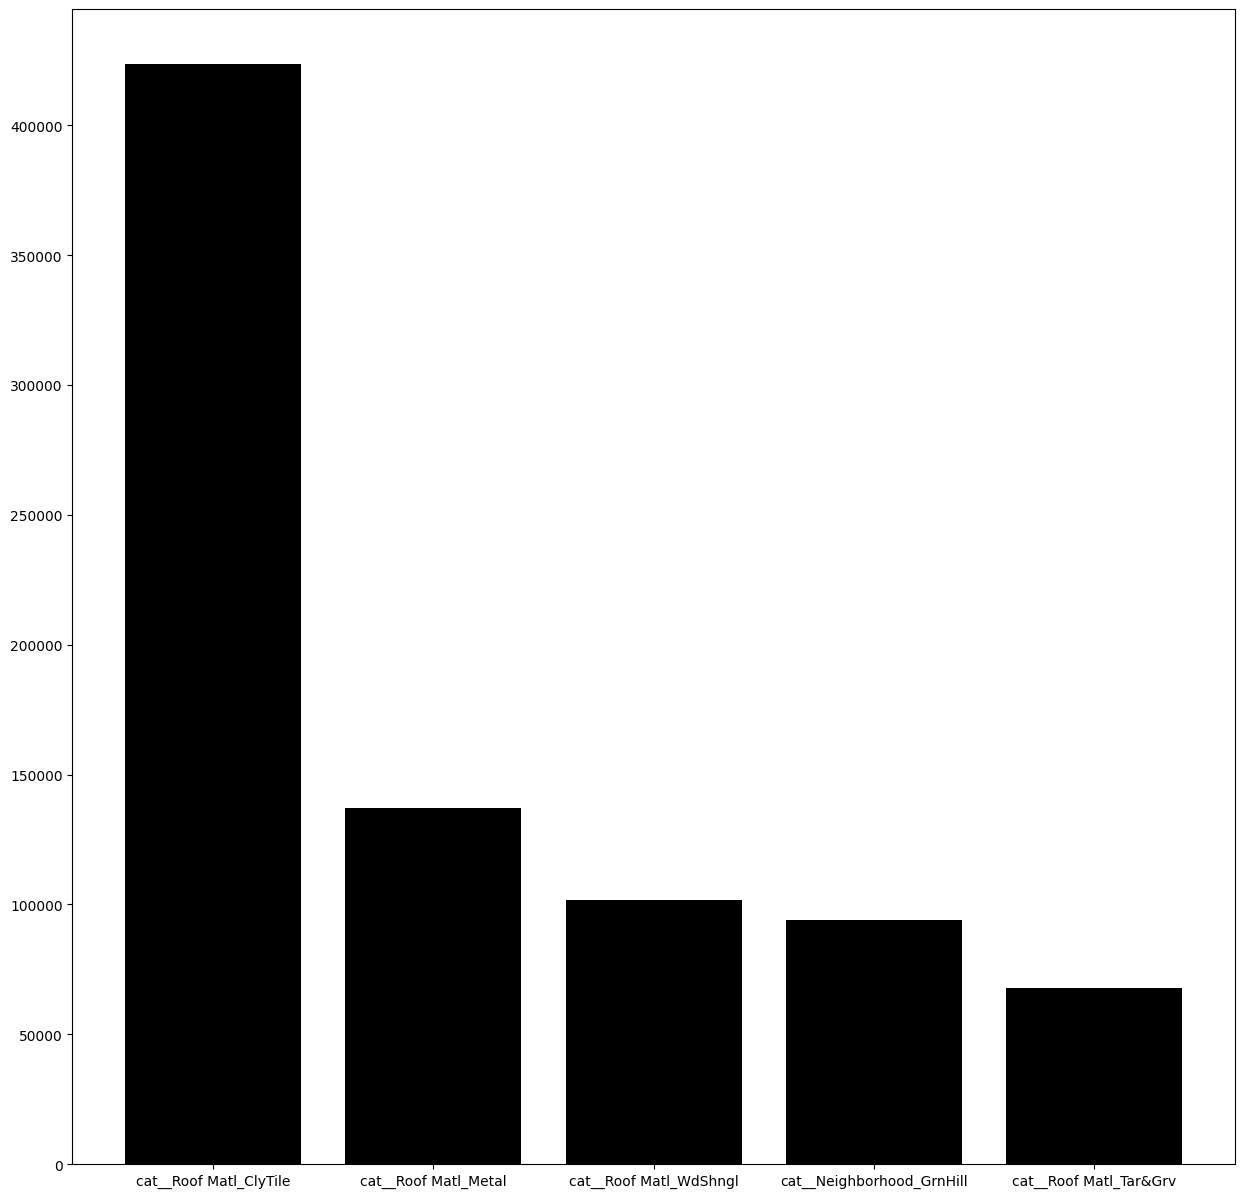

In [50]:
#get top 5 coeff and their feature names

co_eff=np.abs(lr_model.coef_)
feature_names=list(X_train_preprocessed.columns)
abs_co_eff_df=pd.DataFrame(co_eff)
abs_co_eff_df.index=feature_names
abs_co_eff_df.columns=["co_eff"]

sorted_co_eff_df=abs_co_eff_df.sort_values(by="co_eff",ascending=False)
top_5=sorted_co_eff_df.head(5)

import matplotlib.pyplot as plt

# Make sure inputs are lists and lengths match
feature_names = list(feature_names)
plt.figure(figsize=(15,15))
print(top_5['co_eff'])
plt.bar(top_5.index,top_5['co_eff'],color="black")
plt.show()